In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report

data = pd.read_csv('nbaHomeWinLossModelDataset.csv').drop(['Unnamed: 0'],axis=1)
data = data.dropna() 
data[data.isnull().any(axis=1)]
data.head(10) 


,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
5,0.622951,0.645161,2.0,0.457143,0.545455,-0.666667,0.561996,1,2020-21,0.666667,0.735294,1.0,0.709677,0.723077,13.333333,0.644613
6,0.549020,0.633333,2.0,0.457143,0.538462,-18.333333,0.507124,1,2020-21,0.596639,0.500000,1.0,0.625000,0.562500,16.666667,0.599989
7,0.514019,0.620690,1.0,0.457143,0.531250,-26.666667,0.480273,1,2020-21,0.521739,0.387097,1.0,0.437500,0.412698,-7.000000,0.568524
8,0.669565,0.774194,2.0,0.548387,0.661290,12.333333,0.569549,1,2020-21,0.458333,0.620690,2.0,0.470588,0.539683,-17.000000,0.489968
9,0.596774,0.766667,2.0,0.548387,0.655738,-4.666667,0.549138,1,2020-21,0.468468,0.620690,2.0,0.484848,0.548387,2.666667,0.540221


In [9]:
test = data[data["SEASON"] == ("2020-21" or "2021-22")].sample(frac=1) 
train = data[data['SEASON'] == '2022-23']

test1 = data[data["SEASON"] == ("2021-22")].sample(frac=1) 
train1 = data[data['SEASON'] == '2022-23']

X = test.drop(['HOME_W','SEASON'],axis=1)
y = test['HOME_W']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

X1 = test1.drop(['HOME_W','SEASON'],axis=1)
y1 = test1['HOME_W']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=.33) 

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Standard Scaling Prediction Variables
scaler1 = preprocessing.StandardScaler()
scaler1.fit(X1_train)
scaled_data_train1 = scaler.transform(X1_train)
scaled_data_test1 = scaler.transform(X1_test)

print("Shape of Training and Testing Data for 20-22 Training Data")
print(train.shape) 
print(test.shape)

print("Shape of Training and Testing Data for 21-22 Training Data")
print(train1.shape) 
print(test1.shape)

Shape of Training and Testing Data for 20-22 Training Data
(1183, 16)
(1034, 16)
Shape of Training and Testing Data for 21-22 Training Data
(1183, 16)
(1189, 16)


In [10]:
#Logistic Regression
model = DecisionTreeClassifier()
model.fit(scaled_data_train,y_train)
model.score(scaled_data_test,y_test)

decisionTreeF1Score1 = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro');
y_pred = model.predict(scaled_data_test)
print("Analysis for Decision Tree Model trained on the 2020-2021 and 2021-2022 Season Data\n")
print("20-22 Decision Tree Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))
print("Classification Report for Testing Data From the Training Split")
print(classification_report(y_test,y_pred))

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(test.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data = scaler.transform(test.drop(['HOME_W','SEASON'],axis=1))

# How the model performs on unseen data
y_pred = model.predict(scaled_val_data)
print("Classification Report for Predictions on the 2022-2023 Season")
print(classification_report(test['HOME_W'],y_pred)) 
print("###################################################################") 

#Logistic Regression
model1 = DecisionTreeClassifier()
model1.fit(scaled_data_train1,y1_train)
model1.score(scaled_data_test1,y1_test)

decisionTreeF1Score1 = cross_val_score(model1,scaled_data_test1,y1_test,cv=12,scoring='f1_macro');
y1_pred = model1.predict(scaled_data_test1)
print("Analysis for Decision Tree Model trained on the 2021-2022 Season Data\n")
print("21-22 Decision Tree Model F1 Accuracy: %0.2f (+/- %0.2f)"%(decisionTreeF1Score1.mean(), decisionTreeF1Score1.std() *2))
print("Classification report for Testing Data From the Training Split")
print(classification_report(y1_test,y1_pred))

# Standard Scaling Prediction Variables
scaler1 = preprocessing.StandardScaler()
scaler1.fit(test1.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data1 = scaler1.transform(test1.drop(['HOME_W','SEASON'],axis=1))

# How the model performs on unseen data
y1_pred = model1.predict(scaled_val_data1) 
print("Classification Report for predictions on 2022-2023 Season")
print(classification_report(test1['HOME_W'],y1_pred)) 


Analysis for Decision Tree Model trained on the 2020-2021 and 2021-2022 Season Data

20-22 Decision Tree Model F1 Accuracy: 0.56 (+/- 0.22)
Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       144
           1       0.61      0.58      0.59       198

    accuracy                           0.54       342
   macro avg       0.53      0.53      0.53       342
weighted avg       0.54      0.54      0.54       342

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       468
           1       0.85      0.84      0.85       566

    accuracy                           0.83      1034
   macro avg       0.83      0.83      0.83      1034
weighted avg       0.83      0.83      0.83      1034

###################################################################
Analysis for 

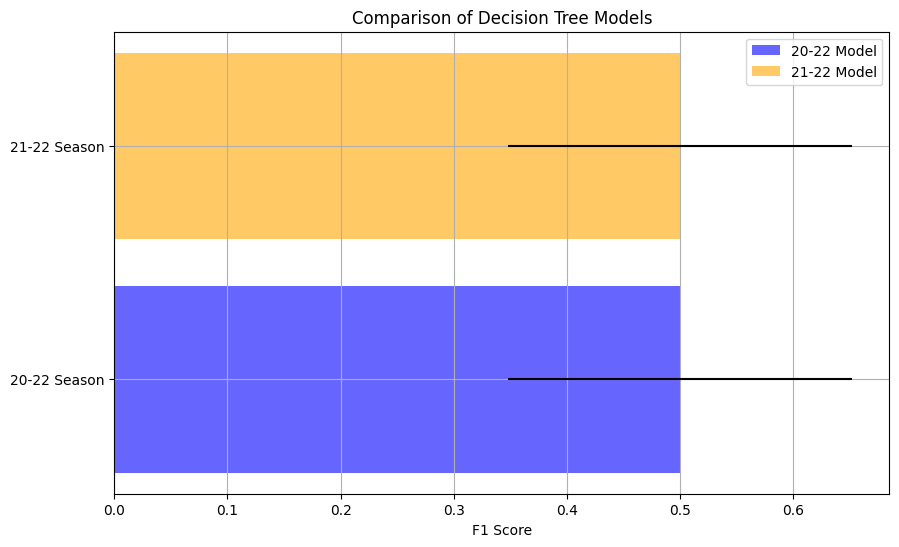

In [11]:
import matplotlib.pyplot as plt

# Bar chart for F1 scores
plt.figure(figsize=(10, 6))

# F1 scores for models trained on 20-22 season data
plt.barh(['20-22 Season'], decisionTreeF1Score1.mean(), xerr=decisionTreeF1Score1.std() * 2, color='blue', alpha=0.6, label='20-22 Model')

# F1 scores for models trained on 21-22 season data
plt.barh(['21-22 Season'], decisionTreeF1Score1.mean(), xerr=decisionTreeF1Score1.std() * 2, color='orange', alpha=0.6, label='21-22 Model')

plt.xlabel('F1 Score')
plt.title('Comparison of Decision Tree Models')
plt.legend()
plt.grid(True)
plt.show()
